# Module 0: Jupyter + Python Bootcamp for Medical Students
## Learn the workflow before learning the models

**Goal:** Become comfortable running and editing notebooks with basic Python and medical data.

### How to use this notebook
- Run cells from top to bottom.
- If something breaks, use `Kernel -> Restart Kernel and Run All Cells`.
- Edit values in the exercise cells and re-run to see what changes.
- This is beginner-friendly and intentionally simple.

### Learning objectives
1. Run and troubleshoot Jupyter notebook cells.
2. Use core Python basics: variables, lists, conditions, loops, and functions.
3. Load and inspect a small synthetic patient dataset with pandas.
4. Create basic plots and interpret them clinically.
5. Build a tiny risk score without training a model.

## Section 0: Why this matters in clinic
You receive a notebook from a colleague that flags high-risk patients.
Before trusting outputs, you need to know how to run, inspect, and sanity-check code.

### Clinical vignette
A patient has diabetes, high blood pressure, and multiple prior admissions.
A notebook says the patient is low risk.
Your job is not to become a software engineer. Your job is to catch obvious mistakes fast.

## Helper Functions
Run this cell once at the start. It auto-configures paths in Google Colab and does nothing harmful on local Jupyter.

In [1]:
import os
import sys
import subprocess
from pathlib import Path

def setup_repo_for_colab(
    repo_url='https://github.com/aaekay/Medical-AI-101.git',
    repo_dir='/content/Medical-AI-101',
    notebook_dir='chapters',
):
    if 'google.colab' not in sys.modules:
        print(f'Local runtime detected. Working directory: {Path.cwd()}')
        return

    repo_path = Path(repo_dir)
    if not repo_path.exists():
        print('Cloning Medical-AI-101 into /content ...')
        subprocess.check_call(['git', 'clone', repo_url, str(repo_path)])

    target = repo_path / notebook_dir
    os.chdir(target)
    print(f'Colab ready. Working directory: {Path.cwd()}')

setup_repo_for_colab()


Local runtime detected. Working directory: /Users/aaekay/Documents/projects/Medical-AI-101/chapters


In [2]:
import sys

print('Python version:', sys.version.split()[0])
print('Notebook kernel is running correctly.')

Python version: 3.13.2
Notebook kernel is running correctly.


## Section 1: Jupyter survival guide
A notebook has two cell types:
- **Markdown**: explanation text
- **Code**: executable Python

### Quick actions
- Run current cell: `Shift + Enter`
- Insert new cell below: `B` (in command mode)
- Change cell to markdown: `M`
- Change cell to code: `Y`
- Restart when confused: `Kernel -> Restart`

In [3]:
# Example of a common error: NameError
try:
    print(last_hba1c)
except NameError as err:
    print('You got:', err)
    print('Fix: define the variable before using it.')

You got: name 'last_hba1c' is not defined
Fix: define the variable before using it.


In [4]:
last_hba1c = 7.8
print('Last HbA1c is now defined:', last_hba1c)

Last HbA1c is now defined: 7.8


In [5]:
# Basic arithmetic with clinical values
systolic_bp = 148
diastolic_bp = 88
mean_arterial_pressure = (systolic_bp + 2 * diastolic_bp) / 3
print('Mean arterial pressure:', round(mean_arterial_pressure, 1))

Mean arterial pressure: 108.0


## Section 2: Python essentials with medical examples

In [6]:
age = 67
smoker = True
ldl_mg_dl = 162

print('age ->', age, type(age))
print('smoker ->', smoker, type(smoker))
print('ldl_mg_dl ->', ldl_mg_dl, type(ldl_mg_dl))

age -> 67 <class 'int'>
smoker -> True <class 'bool'>
ldl_mg_dl -> 162 <class 'int'>


In [7]:
patients = ['P001', 'P002', 'P003', 'P004']
print('First patient:', patients[0])
print('Total patients in this list:', len(patients))

First patient: P001
Total patients in this list: 4


In [8]:
def simple_triage(systolic_bp, has_chest_pain):
    # Educational toy rule. Not for clinical use.
    if systolic_bp >= 160 or has_chest_pain:
        return 'Urgent review'
    return 'Routine follow-up'

print(simple_triage(170, False))
print(simple_triage(135, True))
print(simple_triage(128, False))

Urgent review
Urgent review
Routine follow-up


In [9]:
mini_panel = [
    {'patient_id': 'P010', 'systolic_bp': 130},
    {'patient_id': 'P011', 'systolic_bp': 170},
    {'patient_id': 'P012', 'systolic_bp': 136},
]

for row in mini_panel:
    if row['systolic_bp'] >= 140:
        print(row['patient_id'], '-> elevated BP')
    else:
        print(row['patient_id'], '-> not elevated BP')

P010 -> not elevated BP
P011 -> elevated BP
P012 -> not elevated BP


In [10]:
def calculate_bmi(weight_kg, height_m):
    return weight_kg / (height_m ** 2)

bmi_value = calculate_bmi(88, 1.72)
print('BMI:', round(bmi_value, 1))

BMI: 29.7


### Try it yourself
1. Change the blood pressure values and rerun.
2. Edit `simple_triage` threshold from `160` to `150` and compare outputs.
3. Compute BMI for a different patient.

## Section 3: Tables are your stethoscope (pandas basics)

In [11]:
import pandas as pd

df = pd.read_csv('../data/chapter_00_patients.csv')
df.head()

,patient_id,age,sex,systolic_bp,diastolic_bp,heart_rate,bmi,ldl_mg_dl,smoker,diabetes,hba1c,readmission_30d
0,P001,67,F,152,92,88,31.4,162.0,1,1,8.2,1
1,P002,54,M,138,84,76,28.1,145.0,0,0,5.8,0
2,P003,73,F,166,96,90,29.7,171.0,1,1,8.8,1
3,P004,49,F,126,78,72,24.8,118.0,0,0,5.4,0
4,P005,61,M,148,88,81,30.5,155.0,1,1,7.6,1


In [12]:
print('Rows, columns:', df.shape)
print('Columns:', list(df.columns))
print('\nData types:')
print(df.dtypes)

Rows, columns: (30, 12)
Columns: ['patient_id', 'age', 'sex', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'bmi', 'ldl_mg_dl', 'smoker', 'diabetes', 'hba1c', 'readmission_30d']

Data types:
patient_id          object
age                  int64
sex                 object
systolic_bp          int64
diastolic_bp         int64
heart_rate           int64
bmi                float64
ldl_mg_dl          float64
smoker               int64
diabetes             int64
hba1c              float64
readmission_30d      int64
dtype: object


In [13]:
df.select_dtypes(include='number').describe().T


,count,mean,std,min,25%,50%,75%,max
age,30.0,59.400000,9.372005,44.0,52.25,59.5,66.75,78.0
systolic_bp,30.0,141.100000,14.266793,120.0,129.25,139.0,151.50,170.0
diastolic_bp,30.0,85.566667,6.841473,74.0,80.00,85.0,91.50,98.0
heart_rate,30.0,78.866667,6.916912,68.0,73.25,78.5,84.75,92.0
bmi,29.0,28.317241,2.917689,23.5,26.20,28.1,30.90,33.4
ldl_mg_dl,29.0,144.344828,21.684879,108.0,130.00,145.0,162.00,180.0
smoker,30.0,0.500000,0.508548,0.0,0.00,0.5,1.00,1.0
diabetes,30.0,0.500000,0.508548,0.0,0.00,0.5,1.00,1.0
hba1c,29.0,6.786207,1.318745,5.1,5.60,6.1,8.00,9.1
readmission_30d,30.0,0.500000,0.508548,0.0,0.00,0.5,1.00,1.0


In [14]:
high_bp = df[df['systolic_bp'] >= 150]
print('Patients with systolic BP >= 150:', len(high_bp))
high_bp[['patient_id', 'age', 'systolic_bp', 'diabetes']].head(10)

Patients with systolic BP >= 150: 9


,patient_id,age,systolic_bp,diabetes
0,P001,67,152,1
2,P003,73,166,1
6,P007,70,158,1
10,P011,78,170,1
14,P015,66,150,1
16,P017,71,160,1
20,P021,69,154,1
26,P027,72,162,1
28,P029,68,156,1


In [15]:
print('Missing values per column:')
print(df.isna().sum())

df_clean = df.copy()
df_clean['bmi'] = df_clean['bmi'].fillna(df_clean['bmi'].median())
df_clean['ldl_mg_dl'] = df_clean['ldl_mg_dl'].fillna(df_clean['ldl_mg_dl'].median())
df_clean['hba1c'] = df_clean['hba1c'].fillna(df_clean['hba1c'].median())

print('\nAfter fill:')
print(df_clean.isna().sum())

Missing values per column:
patient_id         0
age                0
sex                0
systolic_bp        0
diastolic_bp       0
heart_rate         0
bmi                1
ldl_mg_dl          1
smoker             0
diabetes           0
hba1c              1
readmission_30d    0
dtype: int64

After fill:
patient_id         0
age                0
sex                0
systolic_bp        0
diastolic_bp       0
heart_rate         0
bmi                0
ldl_mg_dl          0
smoker             0
diabetes           0
hba1c              0
readmission_30d    0
dtype: int64


In [16]:
patients_with_score = df_clean.copy()
patients_with_score['risk_score'] = (
    (patients_with_score['age'] >= 65).astype(int)
    + (patients_with_score['systolic_bp'] >= 150).astype(int)
    + (patients_with_score['ldl_mg_dl'] >= 160).astype(int)
    + patients_with_score['diabetes']
    + patients_with_score['smoker']
)

patients_with_score[['patient_id', 'risk_score']].head(10)

,patient_id,risk_score
0,P001,5
1,P002,0
2,P003,5
3,P004,0
4,P005,2
5,P006,0
6,P007,5
7,P008,0
8,P009,1
9,P010,0


## Section 4: Visual first - quick clinical plots

In [17]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

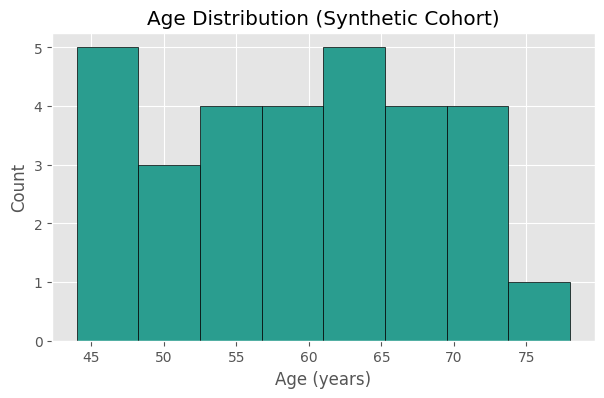

In [18]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.hist(patients_with_score['age'], bins=8, color='#2a9d8f', edgecolor='black')
ax.set_title('Age Distribution (Synthetic Cohort)')
ax.set_xlabel('Age (years)')
ax.set_ylabel('Count')
plt.show()

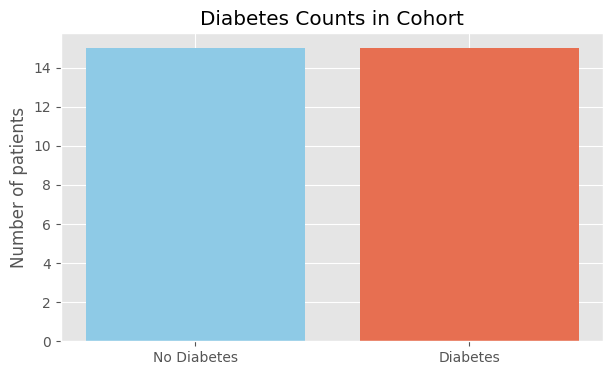

In [19]:
fig, ax = plt.subplots(figsize=(7, 4))
counts = patients_with_score['diabetes'].value_counts().sort_index()
labels = ['No Diabetes', 'Diabetes']
ax.bar(labels, counts.values, color=['#8ecae6', '#e76f51'])
ax.set_title('Diabetes Counts in Cohort')
ax.set_ylabel('Number of patients')
plt.show()

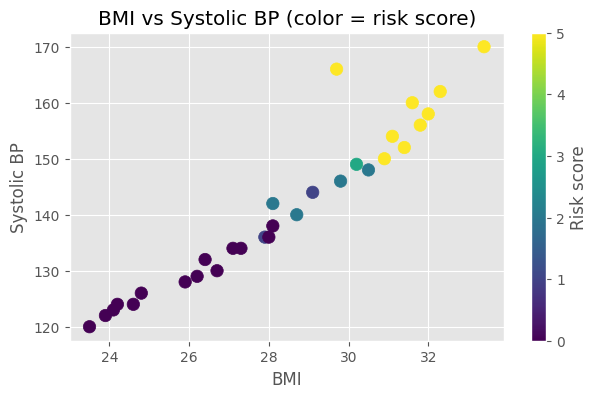

In [20]:
fig, ax = plt.subplots(figsize=(7, 4))
scatter = ax.scatter(
    patients_with_score['bmi'],
    patients_with_score['systolic_bp'],
    c=patients_with_score['risk_score'],
    cmap='viridis',
    s=80
)
ax.set_title('BMI vs Systolic BP (color = risk score)')
ax.set_xlabel('BMI')
ax.set_ylabel('Systolic BP')
fig.colorbar(scatter, ax=ax, label='Risk score')
plt.show()

## Section 5: Mini challenge - define who gets follow-up first
Use the toy `risk_score` to flag a shortlist.
Then adjust thresholds and see how many patients are flagged.

In [21]:
threshold = 8
flagged = patients_with_score[patients_with_score['risk_score'] >= threshold]
print('Threshold:', threshold)
print('Flagged:', len(flagged), 'of', len(patients_with_score))
flagged[['patient_id', 'age', 'systolic_bp', 'ldl_mg_dl', 'risk_score']].head(10)

Threshold: 8
Flagged: 0 of 30


,patient_id,age,systolic_bp,ldl_mg_dl,risk_score


In [ ]:
from IPython.display import display
from ipywidgets import IntSlider, interact

def review_threshold(threshold=8):
    flagged_local = patients_with_score[patients_with_score['risk_score'] >= threshold]
    print('Threshold:', threshold)
    print('Flagged patients:', len(flagged_local), 'out of', len(patients_with_score))
    display(flagged_local[['patient_id', 'age', 'systolic_bp', 'ldl_mg_dl', 'risk_score']].head(10))

interact(review_threshold, threshold=IntSlider(value=8, min=4, max=12, step=1));

interactive(children=(IntSlider(value=8, description='threshold', max=12, min=4), Output()), _dom_classes=('wi…

## Section 6: Notebook habits checklist
### Reproducibility checklist
- Restart kernel and run all before sharing results.
- Keep file paths relative (for example `../data/...`).
- Do not trust one chart; verify with raw rows.

### Safety checklist before acting on output
- Is this real patient data or synthetic demo data?
- Are there missing values or wrong units?
- Does the output match clinical common sense?
- Is this model or score validated for your population?

## Wrap-up
You now have the core skills needed for the rest of Medical AI 101:
- run notebooks safely
- read and edit basic Python
- inspect medical tables
- generate quick visual checks

Next module: `01_history_of_medical_ai.ipynb`.